## import statements and set up

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Load the Data

In [6]:
DATA_PATH = '/Users/yueyangwu/Desktop/CS6140/final_proj/data/wdbc.data'
dataframe = pd.read_csv(DATA_PATH)

# convert diagnosis to code
diagnosis_to_code = {'M' : 1, 'B' : 0}  # {malignant : 1, benign : 0}
dataframe['diagnosis_code'] = [diagnosis_to_code[x] for x in dataframe.diagnosis]

# remove the 'id' and 'diagnosis' columns
dataframe = dataframe.drop(labels=['id', 'diagnosis'], axis=1)
dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [7]:
# normalize the data with mean normalization
def mean_norm(df):
    return df.apply(lambda x : (x - x.mean()) / x.std(), axis=0)
df_mean_norm = mean_norm(dataframe.iloc[:, 0:30])
dataframe.iloc[:, 0:30] = df_mean_norm
dataframe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_code
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1


In [8]:
dataframe['diagnosis_code'].value_counts()

0    357
1    212
Name: diagnosis_code, dtype: int64

## Feature Selection
There are 30 features. Select the top 50% of features

In [9]:
# split data into target and features
y = dataframe['diagnosis_code']
X = dataframe.drop('diagnosis_code', axis=1)

# select the top 50% features
selector = SelectPercentile(mutual_info_classif, percentile=50)
X_reduced = selector.fit_transform(X, y)

# generate the list of featuer that were kept
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst']

## Remove unselected features

In [10]:
# selected_columns.append('diagnosis_code')
X = X[selected_columns]
X

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave_points_worst
0,1.096100,1.268817,0.983510,3.280628,2.650542,2.530249,2.487545,2.830540,2.485391,1.885031,2.301575,1.999478,2.614365,2.107672,2.294058
1,1.828212,1.684473,1.907030,-0.486643,-0.023825,0.547662,0.498816,0.263095,0.741749,1.804340,1.533776,1.888827,-0.430066,-0.146620,1.086129
2,1.578499,1.565126,1.557513,1.052000,1.362280,2.035440,1.227596,0.850180,1.180298,1.510541,1.346291,1.455004,1.081980,0.854222,1.953282
3,-0.768233,-0.592166,-0.763792,3.399917,1.914213,1.450431,0.326087,0.286341,-0.288125,-0.281217,-0.249720,-0.549538,3.889975,1.987839,2.173873
4,1.748758,1.775011,1.824624,0.538866,1.369806,1.427237,1.269426,1.272070,1.189310,1.297434,1.337363,1.219651,-0.313119,0.612640,0.728618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,2.058974,2.341795,0.218868,1.945573,2.318924,2.779634,2.377491,2.601897,1.899514,1.751022,2.013529,-0.273077,0.663928,1.627719
565,1.703356,1.614511,1.722326,-0.017817,0.692434,1.262558,1.299356,1.155840,1.290429,1.535369,1.420690,1.493644,-0.394473,0.236365,0.733182
566,0.701667,0.672084,0.577445,-0.038646,0.046547,0.105684,0.184730,0.276450,0.180539,0.560868,0.578492,0.427529,0.350427,0.326479,0.413705
567,1.836725,1.980781,1.733693,3.269267,3.294046,2.656528,1.156917,1.437265,1.008615,1.959515,2.301575,1.651717,3.901415,3.194794,2.287972


## Split training data(80%) and test data(20%)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((455, 15), (114, 15))

## Fit the Logistic Regression Model

In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Test on the test dataset and calculating the accuracy of the Logistic Regression Model

In [13]:
y_pred_lr = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


## Evaluate Logistic Regression Model

In [23]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred_lr))

[[61  6]
 [ 3 44]]


In [16]:
print(classification_report(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



## Fit the Random Forest Model

In [20]:
# define the model
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train)

RandomForestClassifier()

## Test on the test dataset and calculating the accuracy of the Random Forest Model

In [21]:
y_pred_rf = randforest.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(randforest.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


## Evaluate Random Forests Model

In [24]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred_rf))

[[62  5]
 [ 3 44]]


In [22]:
print(classification_report(y_true=y_test, y_pred=y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



# Data Analysis

# See how each feature influences the results
take a look at the mean values of each feature for the malignant and benign diagnosis

In [12]:
group1 = dataframe.groupby('diagnosis_code').mean().iloc[:, 0:10]
group1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis_code,,,,,,,,,,
0,-0.562072,-0.319664,-0.571778,-0.545869,-0.276066,-0.459290,-0.536149,-0.597939,-0.254461,0.009884
1,0.946507,0.538302,0.962853,0.919222,0.464886,0.773427,0.902855,1.006907,0.428503,-0.016644


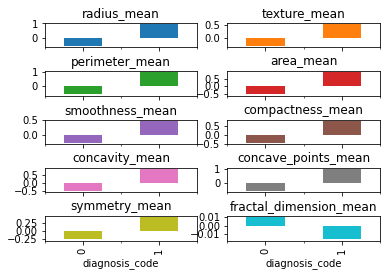

In [13]:
plt1 = group1.plot.bar(subplots=True, layout=(5, 2), legend=None)
plt.subplots_adjust(hspace=1)

## Observation 1
- For the mean value of each feature, radius, perimeter, area, compactness, and concavity of the malignant results are much higher that those of the benign ones.
- No obvious differences shown in texture, smoothness, symmetry, and fractal dimension.

In [14]:
group2 = dataframe.groupby('diagnosis_code').mean().iloc[:, 10:20]
group2

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se
diagnosis_code,,,,,,,,,,
0,-0.436654,0.006393,-0.428190,-0.422104,0.051598,-0.225589,-0.195354,-0.314164,0.005021,-0.060033
1,0.735309,-0.010766,0.721056,0.710807,-0.086889,0.379884,0.328969,0.529041,-0.008456,0.101094


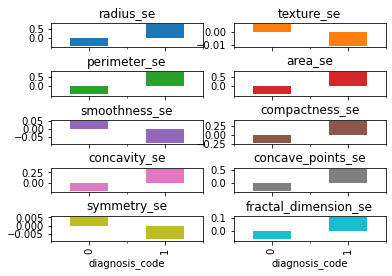

In [15]:
plt2 = group2.plot.bar(subplots=True, layout=(5, 2), legend=None)
plt.subplots_adjust(hspace=1)

## Observation 2
- The standard error of each feature aligns with the results of the mean features. More distance between the errors of malignant and benign means a higher distance of values of the features.

In [16]:
group3 = dataframe.groupby('diagnosis_code').mean().iloc[:, 20:30]
group3

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis_code,,,,,,,,,,
0,-0.597816,-0.351784,-0.602790,-0.564995,-0.324499,-0.455028,-0.507854,-0.610991,-0.320518,-0.249359
1,1.006699,0.592390,1.015076,0.951430,0.546444,0.766250,0.855208,1.028886,0.539740,0.419912


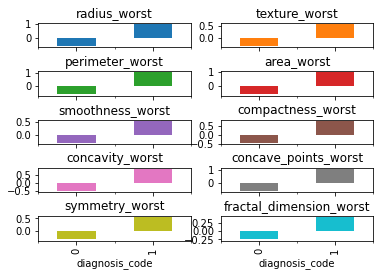

In [17]:
plt3 = group3.plot.bar(subplots=True, layout=(5, 2), legend=None)
plt.subplots_adjust(hspace=1)

## Observation 3
- For malignant result, the worst values of radius, perimeter, area, compactness, concavity, and concave points are higher than the benign ones.
- There are little differents on the worst values of texture, smoothness, symmetry, and fractal dimension.

# See how each feature is correlated with others
plot the first 30 values of radius_mean, texture_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, and concave_points_mean

<AxesSubplot:>

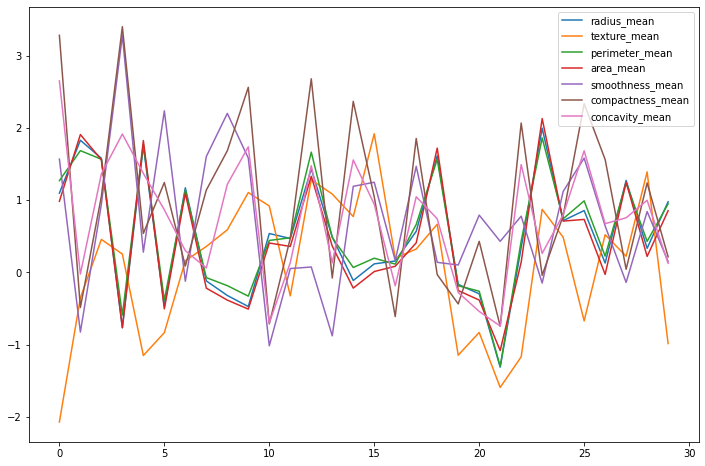

In [18]:
df_mean_norm.iloc[:30, :7].plot.line(figsize=(12, 8))

## Observation
- There are several features that are correlated to each other. For example, radius, perimeter, and area have almost the same curve. Texture and smoothness are more independent to other features.